# **ANALISIS EXPLORATORIO DE DATOS (EDA)**

In [748]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
import seaborn as sns

In [749]:
data = pd.read_csv("/content/DS Challenge.csv", sep= ";")
data.head(7)

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,"608,3456335",21/01/2020,20,{'model': 2020; 'device_score': 3; 'os': 'ANDR...,Super,Merida,FÃ­sica,71000,51,Aceptada,False,"60,83456335","5,475110702",False
1,0,F,"88,71924289",15/01/2020,7,{'model': 2020; 'device_score': 1; 'os': 'ANDR...,NaN,Merida,Virtual,71000,51,Aceptada,False,0,"1,774384858",False
2,1,F,"790,0376533",17/01/2020,11,"{'model': 2020; 'device_score': 1; 'os': ','}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0,"15,80075307",False
3,1,F,"767,0053873",5/01/2020,11,{'model': 2020; 'device_score': 3; 'os': 'WEB'},MPago,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0,"7,670053873",False
4,1,F,"254,1710526",30/01/2020,10,{'model': 2020; 'device_score': 3; 'os': '%%'},NaN,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0,"2,541710526",False
5,1,F,"37,00374724",27/01/2020,3,{'model': 2020; 'device_score': 2; 'os': '%%'},NaN,Guadalajara,FÃ­sica,94000,56,Rechazada,False,0,"0,370037472",False
6,1,F,"334,5160168",6/01/2020,2,{'model': 2020; 'device_score': 1; 'os': '%%'},Abarrotes,Guadalajara,FÃ­sica,94000,56,Aceptada,False,"33,45160168","3,010644152",False


In [750]:
data.shape

(6909, 16)

Se puede visualizar en la variable dispositivo que en la parte de 'os'(sistema operativo), algunos no estan bien rellenados.
Reemplazaremos los valores ' , '  y ' %% ' que aparecen en el 'os' dentro de la variable "**dispositivo**" por el valor 'desconocido' provisionalmente para visualizar mejor los gráficos

In [751]:
import ast 
dispositivo = []
for i in range(len(data['dispositivo'])):
  dispositivo.append(ast.literal_eval(data['dispositivo'][i].replace(';', ','))['os'])
data['dispositivo'] = dispositivo

# VAMOS A REEMPLAZAR LOS VALORES ',' Y '%%' POR LA ETIQUETA 'desconocido' PARA VISUALIZAR SU PROPORCION
data['dispositivo'] = data['dispositivo'].replace(',', 'desconocido')
data['dispositivo'] = data['dispositivo'].replace('%%', 'desconocido')
data['dispositivo'].unique()

array(['ANDROID', 'desconocido', 'WEB'], dtype=object)

Tambien corregiremos el texto de la variable "**tipo_tc**"

In [752]:
data['tipo_tc'] = data['tipo_tc'].replace('FÃ­sica', 'Fisica')
data['tipo_tc'].head()

0     Fisica
1    Virtual
2    Virtual
3     Fisica
4     Fisica
Name: tipo_tc, dtype: object

En los tipos de datos algunos no son adecuados para lo que realmente representan algunas variables 

In [753]:
data.dtypes

ID_USER             int64
genero             object
monto              object
fecha              object
hora                int64
dispositivo        object
establecimiento    object
ciudad             object
tipo_tc            object
linea_tc            int64
interes_tc          int64
status_txn         object
is_prime           object
dcto               object
cashback           object
fraude             object
dtype: object

### **Correcion del tipo de dato**

Para las variables monto, dcto, cashback

In [754]:
monto = []
for item in data['monto']:
    monto.append(float(item.replace(',', '.')))
data['monto'] = monto

dcto = []
for item in data['dcto']:
    dcto.append(float(str(item).replace(',', '.')))
data['dcto'] = dcto

cashback = []
for item in data['cashback']:
    cashback.append(float(str(item).replace(',', '.')))
data['cashback'] = cashback


### **Analizando los valores nulos**
1. Revisando la cantidad de valores nulos

In [755]:
data.isna().sum()

ID_USER               0
genero                0
monto                 0
fecha                 0
hora                  0
dispositivo           0
establecimiento    2588
ciudad             3018
tipo_tc               0
linea_tc              0
interes_tc            0
status_txn            1
is_prime              1
dcto                  1
cashback              1
fraude                1
dtype: int64

2. Dado la cantidad notoria de valores nulos en las variables "**dispositivo**" y "**establecimiento**", lo rellenaremos provisionalmente con la etiqueta "**desconocido**" para visualizar los graficos

In [756]:
data['establecimiento'] = data['establecimiento'].fillna('desconocido')
data['ciudad'] = data['ciudad'].fillna('desconocido')

## **Primeros gráficos**



Existe un 3.3% del total que son Fraude

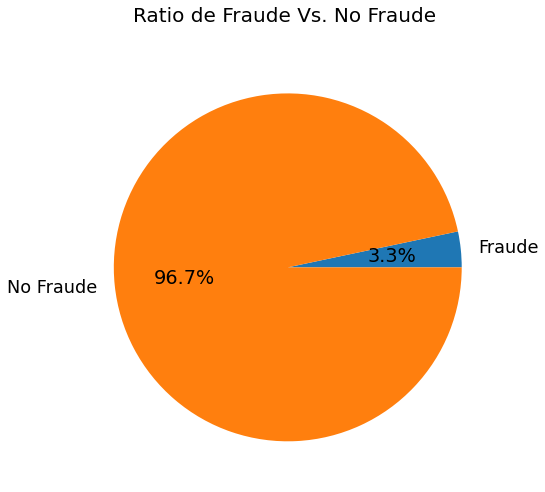

In [757]:
fraude = len(data[data['fraude']==1])
nofraude = len(data[data['fraude']==0])

## Data to plot
labels = 'Fraude','No Fraude'
sizes = [fraude, nofraude]

#plot
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels,autopct='%1.1f%%', startangle=0)
plt.title('Ratio de Fraude Vs. No Fraude \n', fontsize=20)
sns.set_context("paper", font_scale=2)

No se perciben diferencias notorias en la distribucion del "monto" en situaciones de fraude y no fraude. Los rangos minimos y maximos en el monto son similares en ambos grupos, con una ligera alza en la proporcion de monto 0-200 en la situacion de fraude.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribucion de monto en situación de Fraude')

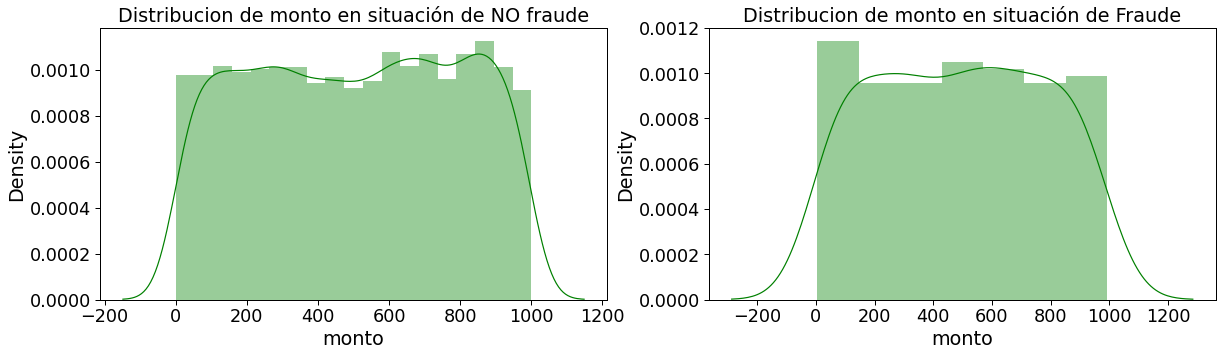

In [758]:
fraude_data = data[data['fraude']==True]
nofraude_data = data[data['fraude']==False]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.distplot(nofraude_data['monto'], color='green', ax=ax[0]);
ax[0].set_title("Distribucion de monto en situación de NO fraude")

sns.distplot(fraude_data['monto'], color='green', ax=ax[1]);
ax[1].set_title("Distribucion de monto en situación de Fraude")

### Podemos observar los casos de fraude por fecha

In [759]:
import datetime

date_time = []
for item in data['fecha']:
    date_time.append(datetime.datetime.strptime(item, '%d/%m/%Y').date())
data['fecha'] = date_time 

Text(0.5, 1.0, 'Densidad de Fraude por fechas')

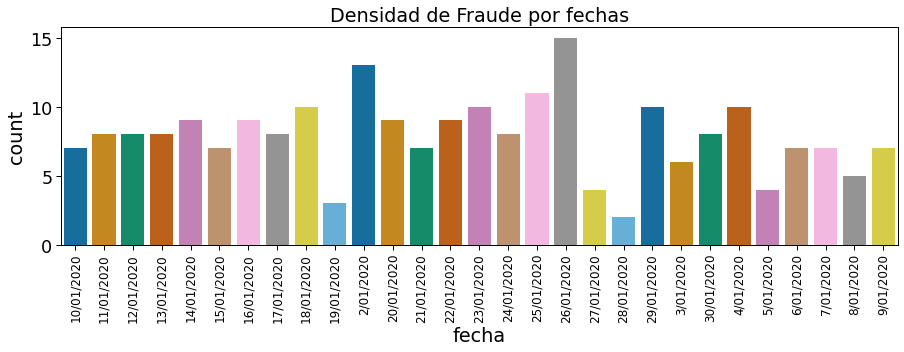

In [760]:
by_date = fraude_data.sort_values('fecha', ascending=True)

plt.figure(figsize= (15,4))
sns.countplot(x=by_date['fecha'], data = by_date, palette='colorblind')
plt.xticks(size=12, rotation = 'vertical')
plt.title("Densidad de Fraude por fechas")

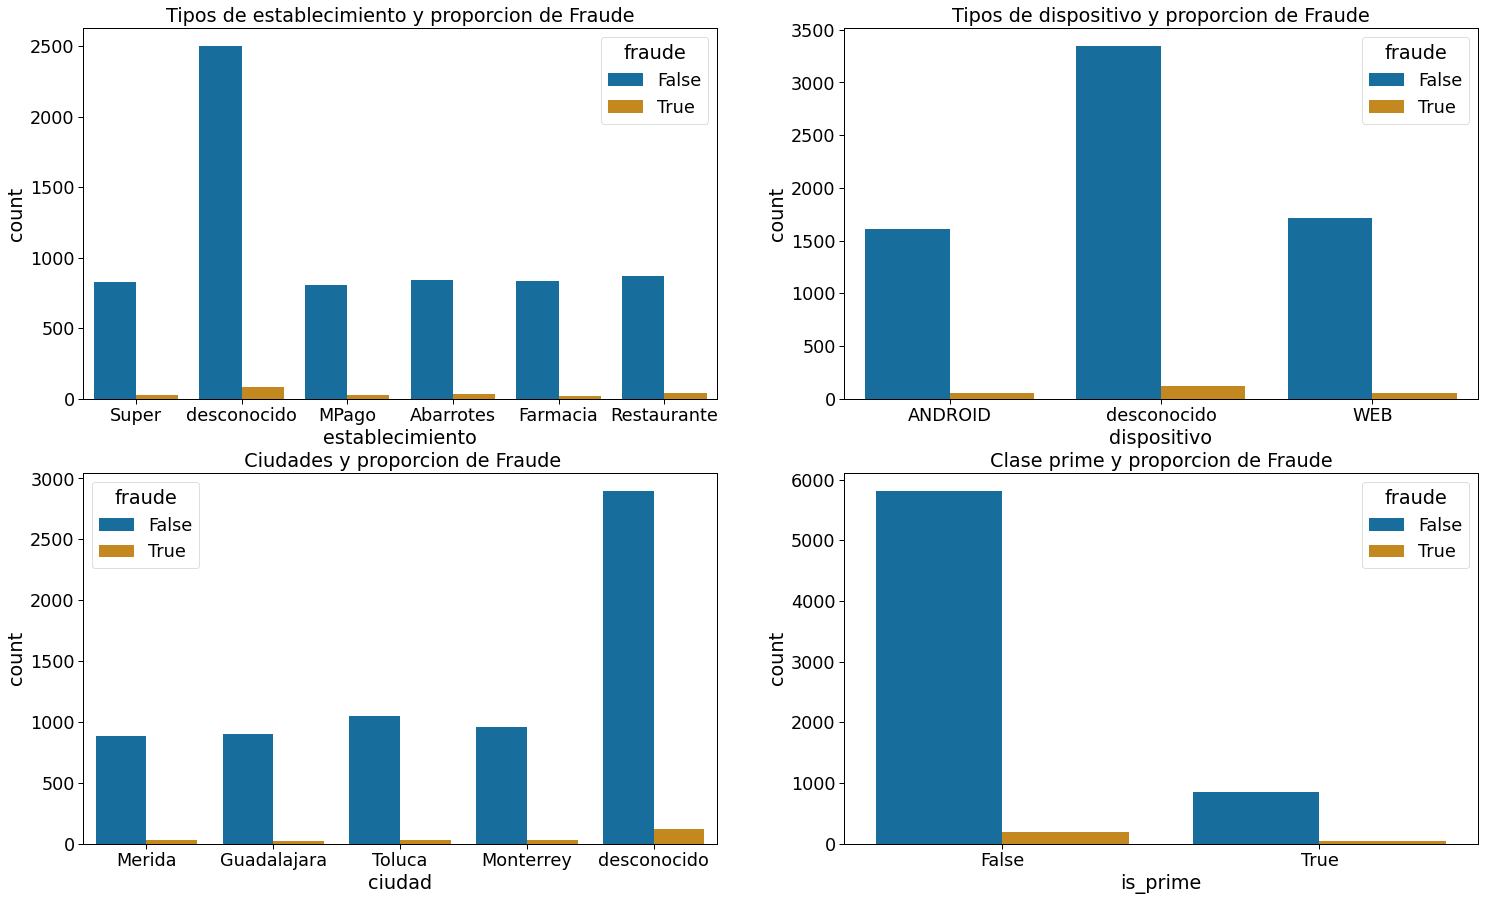

In [761]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,15))

sns.countplot(x='establecimiento', hue='fraude', data = data, palette='colorblind',ax=ax[0][0])
ax[0][0].set_title("Tipos de establecimiento y proporcion de Fraude")

sns.countplot(x='ciudad', hue='fraude', data = data, palette='colorblind',ax=ax[1][0])
ax[1][0].set_title('\n Ciudades y proporcion de Fraude')

sns.countplot(x='dispositivo', hue='fraude', data = data, palette='colorblind',ax=ax[0][1])
ax[0][1].set_title('Tipos de dispositivo y proporcion de Fraude');

sns.countplot(x='is_prime', hue='fraude', data = data, palette='colorblind',ax=ax[1][1])
ax[1][1].set_title('Clase prime y proporcion de Fraude');

Los valores que fueron asignado como 'desconocido' en las variables de **ciudad**, **establecimiento** y **dispositivo**, representan una gran proporcion, y no aportan algun dato interesante cuando se le compara en los grupos de fraude y no fraude. Por ende se opta mejor por intentar una imputacion de datos a esos valores 'desconocidos' mediante un metodo de machine learning basado en el algoritmo KNN (k nearest neighbors), para predecir y rellenar sus valores.


## **Imputación de valores nulos mediante metodo de KNN**

### **Codificar variables categoricas**

In [762]:
data['establecimiento'] = data['establecimiento'].replace('desconocido', np.nan)
data['ciudad'] = data['ciudad'].replace('desconocido', np.nan)
data['dispositivo'] = data['dispositivo'].replace('desconocido', np.nan)

In [763]:
vars_included = data.loc[:, ~data.columns.isin(['ID_USER', 'fecha', 'hora'])].columns

In [764]:
from sklearn.preprocessing import OrdinalEncoder

genero_ordenc = OrdinalEncoder()
data['genero'] = genero_ordenc.fit_transform(data[["genero"]])
dispo_ordenc = OrdinalEncoder()
data["dispositivo"] = dispo_ordenc.fit_transform(data[["dispositivo"]])
establ_ordenc = OrdinalEncoder()
data["establecimiento"] = establ_ordenc.fit_transform(data[["establecimiento"]])
ciu_ordenc = OrdinalEncoder()
data["ciudad"] = ciu_ordenc.fit_transform(data[["ciudad"]])
tipotc_ordenc = OrdinalEncoder()
data["tipo_tc"] = tipotc_ordenc.fit_transform(data[["tipo_tc"]])
isprime_ordenc = OrdinalEncoder()
data["is_prime"] = isprime_ordenc.fit_transform(data[["is_prime"]])
fraude_ordenc = OrdinalEncoder()
data["fraude"] = fraude_ordenc.fit_transform(data[["fraude"]])
statustxn_ordenc = OrdinalEncoder()
data['status_txn'] = statustxn_ordenc.fit_transform(data[["status_txn"]])

data[vars_included]

,genero,monto,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,1.0,608.345633,0.0,4.0,1.0,0.0,71000,51,0.0,0.0,60.834563,5.475111,0.0
1,1.0,88.719243,0.0,NaN,1.0,1.0,71000,51,0.0,0.0,0.000000,1.774385,0.0
2,1.0,790.037653,NaN,NaN,0.0,1.0,94000,56,1.0,0.0,0.000000,15.800753,0.0
3,1.0,767.005387,1.0,2.0,0.0,0.0,94000,56,0.0,0.0,0.000000,7.670054,0.0
4,1.0,254.171053,NaN,NaN,0.0,0.0,94000,56,0.0,0.0,0.000000,2.541711,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6904,2.0,852.563741,1.0,1.0,NaN,1.0,94000,45,2.0,0.0,85.256374,15.346147,0.0
6905,2.0,755.155504,NaN,NaN,NaN,1.0,94000,45,0.0,0.0,0.000000,15.103110,1.0
6906,2.0,253.325077,1.0,4.0,NaN,0.0,94000,45,1.0,0.0,0.000000,2.533251,0.0
6907,2.0,202.956233,NaN,NaN,NaN,0.0,94000,45,0.0,0.0,0.000000,2.029562,0.0



### **Método de estandarización min-max**

Primero normalizamos los valores que van a ingresar a la función KNN imputer, mediante el método de estandarización min-max


In [765]:
#Obtenemos y almacenamos los valores mínimos y máximos de las variables incluidas
vmin = data[vars_included].min()
vmax = data[vars_included].max()

In [766]:
#Almacenamos la data en una variable llama data_to_norm, la cual almacenará la data con los valores de las variables numéricas estandarizadas.
data_to_norm = data

In [767]:
#Implementamos la función min-max y la ejecutamos
def minmax_norm(df_input):
    return (df_input-df_input.min())/(df_input.max() - df_input.min())

data_to_norm[vars_included] = minmax_norm(data[vars_included])
print(data_to_norm[vars_included])

      genero     monto  dispositivo  ...      dcto  cashback  fraude
0        0.5  0.608332          0.0  ...  0.305614  0.273809     0.0
1        0.5  0.088434          0.0  ...  0.000000  0.088625     0.0
2        0.5  0.790119          NaN  ...  0.000000  0.790505     0.0
3        0.5  0.767075          1.0  ...  0.000000  0.383644     0.0
4        0.5  0.253972          NaN  ...  0.000000  0.127022     0.0
...      ...       ...          ...  ...       ...       ...     ...
6904     1.0  0.852678          1.0  ...  0.428302  0.767756     0.0
6905     1.0  0.755218          NaN  ...  0.000000  0.755594     1.0
6906     1.0  0.253126          1.0  ...  0.000000  0.126598     0.0
6907     1.0  0.202731          NaN  ...  0.000000  0.101394     0.0
6908     1.0  0.564886          NaN  ...       NaN       NaN     NaN

[6909 rows x 13 columns]


In [768]:
data_to_norm

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,0.5,0.608332,2020-01-21,20,0.0,1.00,0.333333,0.0,0.621622,0.783333,0.0,0.0,0.305614,0.273809,0.0
1,0,0.5,0.088434,2020-01-15,7,0.0,NaN,0.333333,1.0,0.621622,0.783333,0.0,0.0,0.000000,0.088625,0.0
2,1,0.5,0.790119,2020-01-17,11,NaN,NaN,0.000000,1.0,0.932432,0.866667,0.5,0.0,0.000000,0.790505,0.0
3,1,0.5,0.767075,2020-01-05,11,1.0,0.50,0.000000,0.0,0.932432,0.866667,0.0,0.0,0.000000,0.383644,0.0
4,1,0.5,0.253972,2020-01-30,10,NaN,NaN,0.000000,0.0,0.932432,0.866667,0.0,0.0,0.000000,0.127022,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6904,1060,1.0,0.852678,2020-01-28,10,1.0,0.25,NaN,1.0,0.932432,0.683333,1.0,0.0,0.428302,0.767756,0.0
6905,1060,1.0,0.755218,2020-01-26,16,NaN,NaN,NaN,1.0,0.932432,0.683333,0.0,0.0,0.000000,0.755594,1.0
6906,1060,1.0,0.253126,2020-01-18,16,1.0,1.00,NaN,0.0,0.932432,0.683333,0.5,0.0,0.000000,0.126598,0.0
6907,1060,1.0,0.202731,2020-01-12,23,NaN,NaN,NaN,0.0,0.932432,0.683333,0.0,0.0,0.000000,0.101394,0.0


### **Metodo KNN imputer**

In [769]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=3)
data_to_norm[vars_included] = knn.fit_transform(data_to_norm[vars_included])
data_to_norm.isnull().sum()

ID_USER            0
genero             0
monto              0
fecha              0
hora               0
dispositivo        0
establecimiento    0
ciudad             0
tipo_tc            0
linea_tc           0
interes_tc         0
status_txn         0
is_prime           0
dcto               0
cashback           0
fraude             0
dtype: int64

In [770]:
data_to_desnorm = data_to_norm

In [771]:
#Implementamos la función min-max en reversa y la ejecutamos
def minmax_desnorm(df_input):
  return (df_input)*(vmax - vmin) + vmin

data_to_desnorm[vars_included] = minmax_desnorm(data_to_norm[vars_included])

Una vez que se tiene el dataset con los valores desnormalizados y con los valores nulos imputados, se almacena nuevamente el dataset.

In [772]:
data = data_to_desnorm

In [773]:
data[["dispositivo"]] = dispo_ordenc.inverse_transform(data[["dispositivo"]])
data[["establecimiento"]] = establ_ordenc.inverse_transform(data[["establecimiento"]])
data[["ciudad"]] = ciu_ordenc.inverse_transform(data[["ciudad"]])
data[["tipo_tc"]] = tipotc_ordenc.inverse_transform(data[["tipo_tc"]])
data[["is_prime"]] = isprime_ordenc.inverse_transform(data[["is_prime"]])
data[["fraude"]] = fraude_ordenc.inverse_transform(data[["fraude"]])
data[['genero']] = genero_ordenc.inverse_transform(data[['genero']])
data[['status_txn']] = statustxn_ordenc.inverse_transform(data[['status_txn']])

In [774]:
data

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345633,2020-01-21,20,ANDROID,Super,Merida,Fisica,71000.0,51.0,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,ANDROID,MPago,Merida,Virtual,71000.0,51.0,Aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,2020-01-17,11,ANDROID,MPago,Guadalajara,Virtual,94000.0,56.0,En proceso,False,0.000000,15.800753,False
3,1,F,767.005387,2020-01-05,11,WEB,MPago,Guadalajara,Fisica,94000.0,56.0,Aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,2020-01-30,10,ANDROID,Farmacia,Guadalajara,Fisica,94000.0,56.0,Aceptada,False,0.000000,2.541711,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6904,1060,M,852.563741,2020-01-28,10,WEB,Farmacia,Merida,Virtual,94000.0,45.0,Rechazada,False,85.256374,15.346147,False
6905,1060,M,755.155504,2020-01-26,16,ANDROID,Farmacia,Merida,Virtual,94000.0,45.0,Aceptada,False,0.000000,15.103110,True
6906,1060,M,253.325077,2020-01-18,16,WEB,Super,Merida,Fisica,94000.0,45.0,En proceso,False,0.000000,2.533251,False
6907,1060,M,202.956233,2020-01-12,23,ANDROID,MPago,Monterrey,Fisica,94000.0,45.0,Aceptada,False,0.000000,2.029562,False


In [775]:
data.isnull().sum()

ID_USER            0
genero             0
monto              0
fecha              0
hora               0
dispositivo        0
establecimiento    0
ciudad             0
tipo_tc            0
linea_tc           0
interes_tc         0
status_txn         0
is_prime           0
dcto               0
cashback           0
fraude             0
dtype: int64

### Finalmente la data se encuentra limpia de valores nulos y con las variables correcta y adecuadamente rellenadas para su análisis.

In [785]:
data.to_csv('fraud_data_complete_final.csv')

In [777]:
data.dtypes

ID_USER              int64
genero              object
monto              float64
fecha               object
hora                 int64
dispositivo         object
establecimiento     object
ciudad              object
tipo_tc             object
linea_tc           float64
interes_tc         float64
status_txn          object
is_prime              bool
dcto               float64
cashback           float64
fraude                bool
dtype: object

## **Correlaciones entre las variables**

<function matplotlib.pyplot.title>

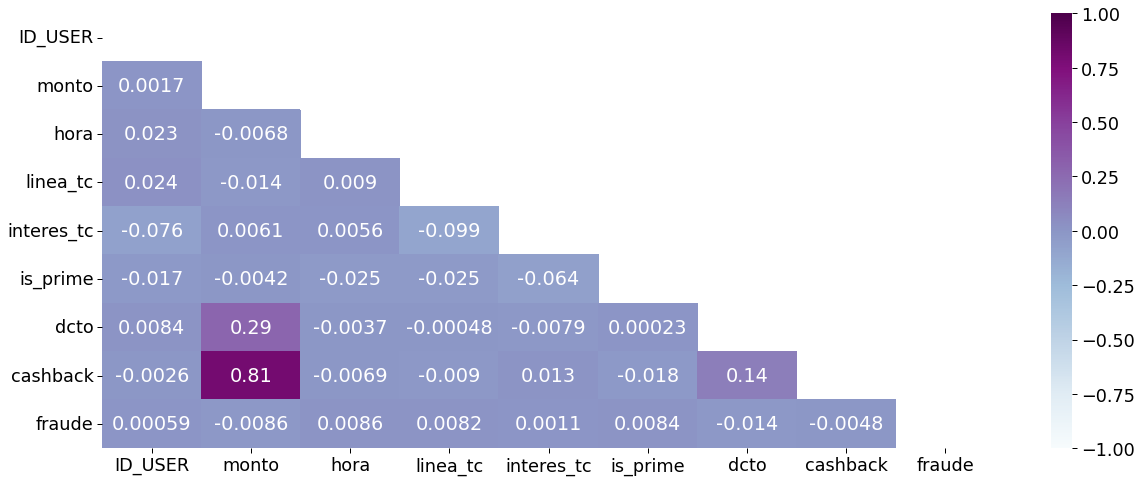

In [778]:
from scipy import stats
num_corr= data.corr()
plt.figure(figsize=(20, 8))
mask = np.triu(np.ones_like(num_corr, dtype=np.bool))
num_heatmap = sns.heatmap(num_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BuPu')
plt.title

Algunas correlaciones halladas, refieren que a mayor monto le corresponde mayor cashback y dcto. Y tambien que a mayor dcto le corresponde mayor cashback

### **Analisis de la data con estado de fraude**

Cabe recalcar que a este nivel, ya no se encuentran valores nulos, pues fueron imputados previamente con el algoritmo de machine learning KNNimputer




In [779]:
fraude_data = data[data['fraude']==True]

In [780]:
fraude_data.shape

(229, 16)

In [781]:
fraude_data['establecimiento'].unique()

array(['Farmacia', 'Abarrotes', 'MPago', 'Restaurante', 'Super'],
      dtype=object)

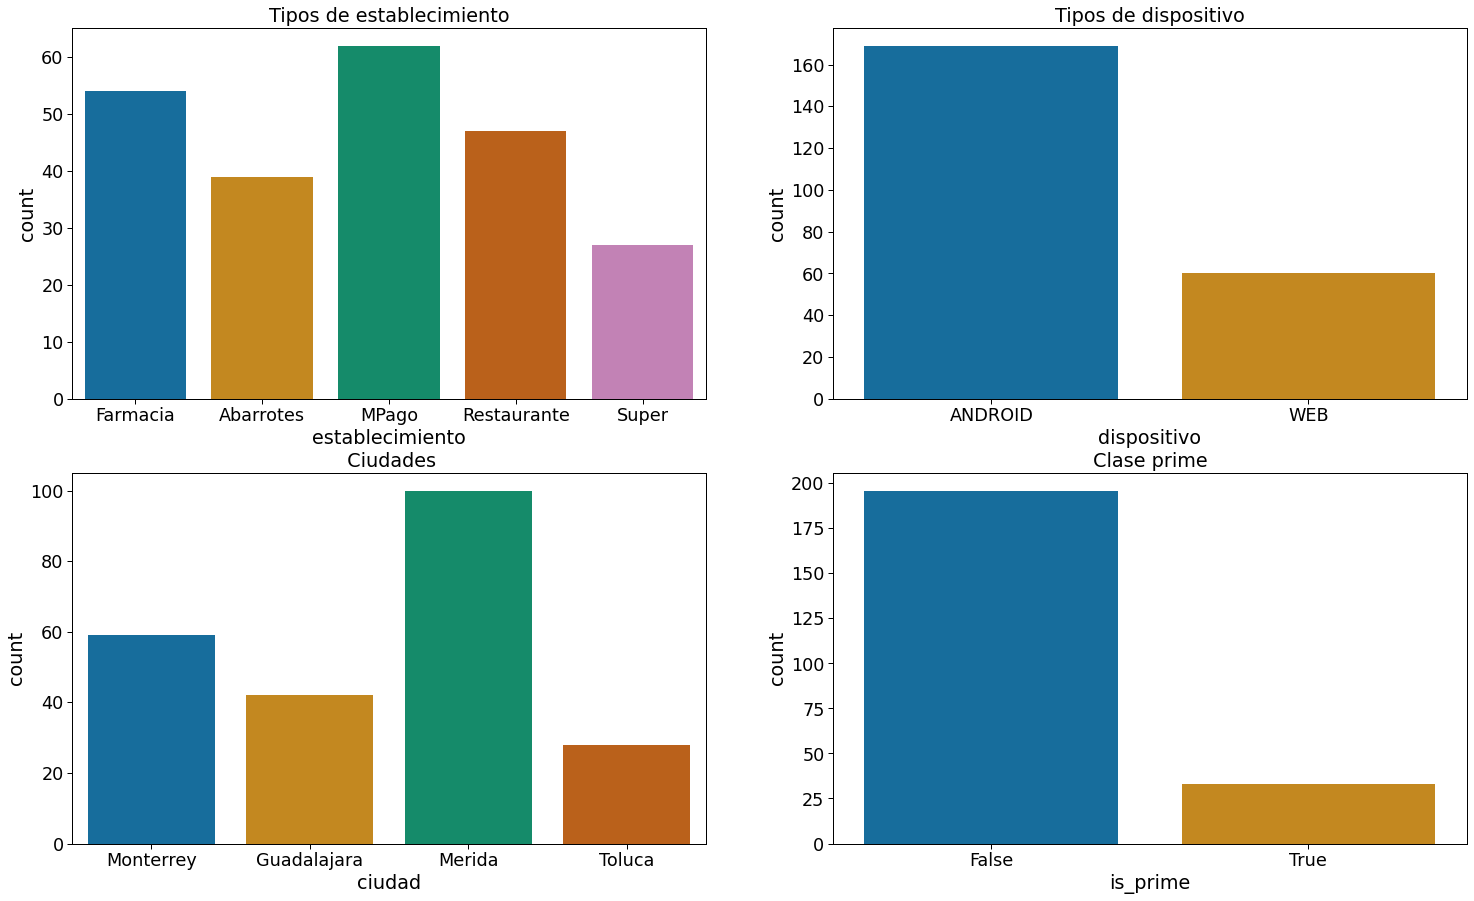

In [782]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,15))

sns.countplot(x='establecimiento', data = fraude_data, palette='colorblind',ax=ax[0][0])
ax[0][0].set_title("Tipos de establecimiento")

sns.countplot(x='ciudad', data = fraude_data, palette='colorblind',ax=ax[1][0])
ax[1][0].set_title('\n Ciudades')

sns.countplot(x='dispositivo', data = fraude_data, palette='colorblind',ax=ax[0][1])
ax[0][1].set_title('Tipos de dispositivo');

sns.countplot(x='is_prime', data = fraude_data, palette='colorblind',ax=ax[1][1])
ax[1][1].set_title('Clase prime');

- Se visualiza que hay mas fraude en el establecimiento MPago, y menos en el Super.
- Tambien que hay mas fraude desde dispositivo ANDROID.
- Y más en la ciudad de Merida, y los mas bajos en Toluca
- Asimismo que la mayor cantidad de fraude se da en clientes que no son Prime.

Text(0.5, 1.0, 'Distribucion de interes_tc en situación de Fraude')

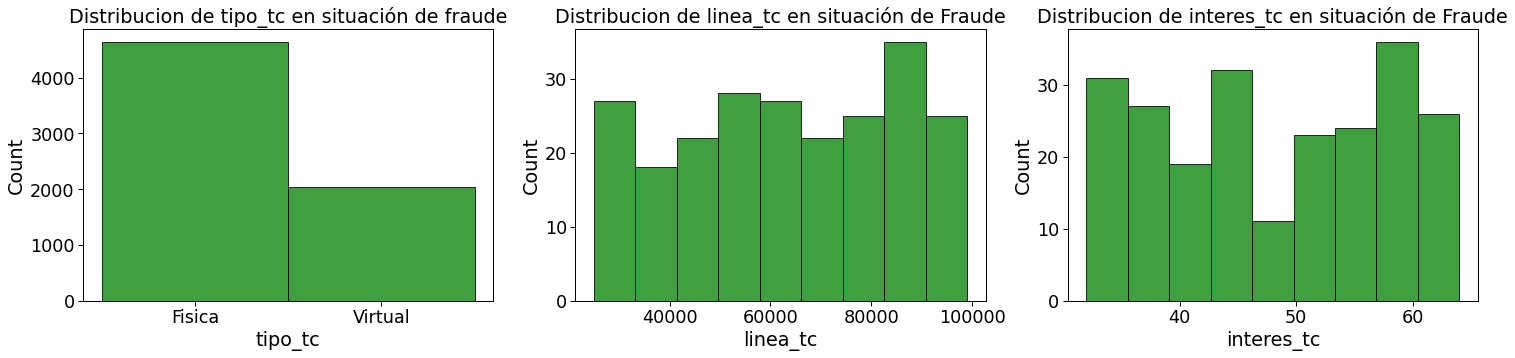

In [783]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,5))

sns.histplot(nofraude_data['tipo_tc'], color='green', ax=ax[0]);
ax[0].set_title("Distribucion de tipo_tc en situación de fraude")

sns.histplot(fraude_data['linea_tc'], color='green', ax=ax[1]);
ax[1].set_title("Distribucion de linea_tc en situación de Fraude")

sns.histplot(fraude_data['interes_tc'], color='green', ax=ax[2]);
ax[2].set_title("Distribucion de interes_tc en situación de Fraude")

- Se observa una mayor densidad en el tipo_tc 'Fisica' que en la 'Virtual'.
- Y en cuanto la variable interes_tc se observa una menor densidad de casos de fraude en el intervalo aproximado de 47 - 50.
